## Simple Models 

### Import Packages and cleaned data 

In [120]:
# regular package 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import os
import string


# nltk 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Doylism/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# import cleaned data
df = pd.read_csv('../../clean_data/clean_comments.csv', index_col=0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
df.head(20)

,MBTI,comments
0,INFP,lol thats left
1,INTP,post try telling people time im always joking ...
2,INFP,first thought pepsi something probably alcohol
3,ENTP,formula something like every time says add bpm...
4,INTP,imply im five
5,INTP,well wouldnt know think theres lot potential t...
6,INFJ,sine na support directors actors people behind...
7,INFP,use enough vacation days dont lose time rolls
8,INTP,ur angle youre devil
9,INTP,mean dont much influence crow ruby


In [10]:
df.isna().sum()

MBTI            0
comments    23971
dtype: int64

In [11]:
# drop the null values
df = df.dropna()

In [12]:
df.isna().sum()

MBTI        0
comments    0
dtype: int64

In [13]:
df.shape
# now we are left with 2.97 million of comments 

(2976811, 2)

### Simple Models 
#### Split the data

In [127]:
X = df['comments']
y = df['MBTI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

In [17]:
mbti = ['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ISTP','ISFP','ENTJ','ISTJ','ENFJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ']

#### Logistic Regression

In [15]:
my_logit = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression(solver='saga'))
])
my_logit.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of itera

KeyboardInterrupt: 

In [ ]:
y_pred = my_logit.predict(X_test)

print('accuracy %s' % my_logit.score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=mbti))

#### Naive Bayes 

In [16]:
# build a pipeline for vectorise, transform and clasify the data 
my_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
my_nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [18]:
y_pred = my_nb.predict(X_test)

print('accuracy %s' % my_nb.score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=mbti))

accuracy 0.1707676217521197
              precision    recall  f1-score   support

        INFP       0.59      0.06      0.11     54044
        INFJ       0.45      0.04      0.08     61673
        INTP       0.24      0.15      0.18     76574
        INTJ       0.35      0.06      0.10     67098
        ENTP       0.95      0.01      0.02     18187
        ENFP       0.79      0.01      0.01     19948
        ISTP       0.76      0.03      0.06     28917
        ISFP       0.63      0.09      0.15     48215
        ENTJ       0.17      0.22      0.19     81090
        ISTJ       0.13      0.58      0.21     92517
        ENFJ       0.53      0.02      0.05     52415
        ISFJ       0.14      0.40      0.21     89301
        ESTP       0.63      0.05      0.09     46995
        ESFP       0.71      0.07      0.14     42366
        ESFJ       0.60      0.03      0.05     46371
        ESTJ       0.45      0.17      0.25     67333

   micro avg       0.17      0.17      0.17    89304

#### LInear SVM 

In [19]:
sgd = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', \
                                random_state=42, max_iter=5, tol=None))
])

sgd.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [20]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % sgd.score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=mbti))

accuracy 0.16417220204155675
              precision    recall  f1-score   support

        INFP       0.19      0.24      0.21     54044
        INFJ       0.18      0.14      0.16     61673
        INTP       0.18      0.18      0.18     76574
        INTJ       0.16      0.16      0.16     67098
        ENTP       0.22      0.20      0.21     18187
        ENFP       0.20      0.25      0.22     19948
        ISTP       0.26      0.32      0.28     28917
        ISFP       0.24      0.27      0.25     48215
        ENTJ       0.17      0.17      0.17     81090
        ISTJ       0.17      0.12      0.14     92517
        ENFJ       0.15      0.13      0.14     52415
        ISFJ       0.16      0.15      0.15     89301
        ESTP       0.19      0.19      0.19     46995
        ESFP       0.23      0.26      0.24     42366
        ESFJ       0.18      0.18      0.18     46371
        ESTJ       0.25      0.29      0.27     67333

   micro avg       0.19      0.19      0.19    8930

## Bag of Words 

In [89]:
df_clean = pd.read_csv('../../clean_data/spacy_clean.csv', index_col=0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [90]:
df_clean.head()

,MBTI,comments,comments_lemma
0,INFP,Lol that's why I left.,lol that be why leave
1,INTP,"I was just about to post ""I try telling people...",be just about to post try tell people all the ...
2,INFP,My first thought was Pepsi or something. Proba...,first thought be pepsi or something probably n...
3,ENTP,"Not if the formula is something like ""every ti...",not if the formula be something like every tim...
4,INTP,Does this imply I'm a five now?,do this imply be five now


In [91]:
df_clean.isna().sum()

MBTI                  0
comments              0
comments_lemma    23125
dtype: int64

In [92]:
df_clean = df_clean.dropna()

In [93]:
# remove the digits and replace with white space 
pattern = '[0-9]'

df_clean['comments_lemma'] = df_clean['comments_lemma'].apply(lambda x: re.sub(pattern,' ', x))

# remove underscore 
df_clean['comments_lemma'] = df_clean['comments_lemma'].apply(lambda x: x.replace('_',' '))

In [94]:
X = df_clean['comments_lemma']
y = df_clean['MBTI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

In [95]:
bagofwords = CountVectorizer(min_df=50, stop_words='english')
bagofwords.fit(X_train)
X_train_dtm = bagofwords.transform(X_train)
X_test_dtm = bagofwords.transform(X_test)

In [96]:
X_train_dtm.shape

(2084359, 23766)

In [97]:
bagofwords.get_feature_names()[0:50]

['aa',
 'aaa',
 'aaaaaand',
 'aaaaand',
 'aaaand',
 'aaah',
 'aaand',
 'aac',
 'aah',
 'aan',
 'aang',
 'aaron',
 'aaryn',
 'aas',
 'ab',
 'aback',
 'abandon',
 'abandonment',
 'abbey',
 'abbott',
 'abbreviate',
 'abbreviation',
 'abby',
 'abc',
 'abdoman',
 'abdominal',
 'abduct',
 'abduction',
 'abe',
 'abed',
 'abel',
 'aber',
 'aberration',
 'abh',
 'abhor',
 'abhorrent',
 'abide',
 'abilify',
 'ability',
 'abit',
 'abject',
 'able',
 'ableist',
 'ableton',
 'abnormal',
 'abnormality',
 'abnormally',
 'aboard',
 'abolish',
 'abolition']

### Grid Search 

In [111]:
df_test = df_clean.sample(n=2000)
X_trial = df_test['comments_lemma']
y_trial = df_test['MBTI']

In [112]:
X_trial_train, X_trial_test, y_trial_train, y_trial_test = train_test_split(X_trial, y_trial, test_size=0.3, stratify=y_trial, random_state=42)

In [123]:
pipeline = Pipeline([ ('vect', CountVectorizer()),('model', LogisticRegression())])

param_grid = [
    # Logistic Regression
    {'vect':[TfidfVectorizer()], 'model':[LogisticRegression(solver='saga')],
    'model__penalty':['l1','l2'], 'model__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'vect__min_df':[50, 100, 300, 500], 'vect__smooth_idf': (True, False),
     'vect__norm': ('l1', 'l2', None)},
    
    # Random Forest
    {'vect':[TfidfVectorizer()], 'model':[RandomForestClassifier()],
     'vect__min_df':[50, 100, 300, 500], 
     'model__n_estimators': [50, 100, 150, 200], 'model__max_depth':[2, 5, 10, 15, 20],
     'vect__smooth_idf': (True, False), 'vect__norm': ('l1', 'l2', None)},
    
    # XG Boost
    {'vect':[TfidfVectorizer()], 'model':[XGBClassifier()],
     'vect__min_df':[50, 100, 300, 500], 'model__learning_rate': [0.1, 0.5, 1, 2],
     'model__n_estimators': [50, 100, 150, 200], 'model__max_depth':[2, 5, 10, 15, 20],
     'vect__smooth_idf': (True, False), 'vect__norm': ('l1', 'l2', None)},
    
    # Linear SVC
    {'vect':[TfidfVectorizer()], 'model':[SGDClassifier()],
     'vect__min_df':[50, 100, 300, 500], 'model__learning_rate': [0.1, 0.5, 1, 2],
     'model__max_depth':[2, 5, 10, 15, 20],
     'vect__smooth_idf': (True, False), 'vect__norm': ('l1', 'l2', None)}
]

grid = GridSearchCV(pipeline, param_grid, cv=5, verbose=10, n_jobs=-1)
fittedgrid = grid.fit(X_trial_train, y_trial_train)

fittedgrid.score(X_trial_test, y_trial_test)

Fitting 5 folds for each of 3216 candidates, totalling 16080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

KeyboardInterrupt: 

In [ ]:
# save model 
from sklearn.externals import joblib
joblib.dump(grid.best_estimator_, 'bestmodel.pkl', compress = 1)

In [117]:
fittedgrid.best_estimator_

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=500,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))])

In [118]:
grid_results = pd.concat([pd.DataFrame(fittedgrid.cv_results_["params"]),pd.DataFrame(fittedgrid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values(by='Accuracy', ascending = False)

In [119]:
grid_results

,model,model__C,model__penalty,vect,vect__min_df,Accuracy
47,"LogisticRegression(C=0.1, class_weight=None, d...",0.100,l2,"TfidfVectorizer(analyzer='word', binary=False,...",500,0.115000
103,"LogisticRegression(C=0.1, class_weight=None, d...",1000.000,l1,"TfidfVectorizer(analyzer='word', binary=False,...",500,0.113571
87,"LogisticRegression(C=0.1, class_weight=None, d...",100.000,l1,"TfidfVectorizer(analyzer='word', binary=False,...",500,0.113571
63,"LogisticRegression(C=0.1, class_weight=None, d...",1.000,l2,"TfidfVectorizer(analyzer='word', binary=False,...",500,0.113571
79,"LogisticRegression(C=0.1, class_weight=None, d...",10.000,l2,"TfidfVectorizer(analyzer='word', binary=False,...",500,0.113571
...,...,...,...,...,...,...
88,"LogisticRegression(C=0.1, class_weight=None, d...",100.000,l2,"CountVectorizer(analyzer='word', binary=False,...",50,0.068571
96,"LogisticRegression(C=0.1, class_weight=None, d...",1000.000,l1,"CountVectorizer(analyzer='word', binary=False,...",50,0.068571
80,"LogisticRegression(C=0.1, class_weight=None, d...",100.000,l1,"CountVectorizer(analyzer='word', binary=False,...",50,0.068571
59,"LogisticRegression(C=0.1, class_weight=None, d...",1.000,l2,"CountVectorizer(analyzer='word', binary=False,...",500,0.067857


## (Hopefully) Improved Models

In [145]:
data = pd.read_csv('../../clean_data/token_voc.csv', index_col=0)

/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [146]:
data.head(20)

,MBTI,comments_lemma
0,INFP,lol leave
1,INTP,post try tell people time always joke unless s...
2,INFP,first thought pepsi something probably alcohol
3,ENTP,formula something like every time say add bpm ...
4,INTP,imply five
5,INTP,well would know think lot potential technology...
6,INFJ,sine support director actor people behind film
7,INFP,use enough vacation day lose time roll
8,INTP,angle devil
9,INTP,mean much influence crow ruby


In [147]:
data.isna().sum()

MBTI                  0
comments_lemma    26183
dtype: int64

In [148]:
data = data.dropna()

In [132]:
data.shape

(2961190, 2)

In [149]:
data = data[data['comments_lemma'].str.len() > 4]

In [150]:
data.shape

(2881896, 2)

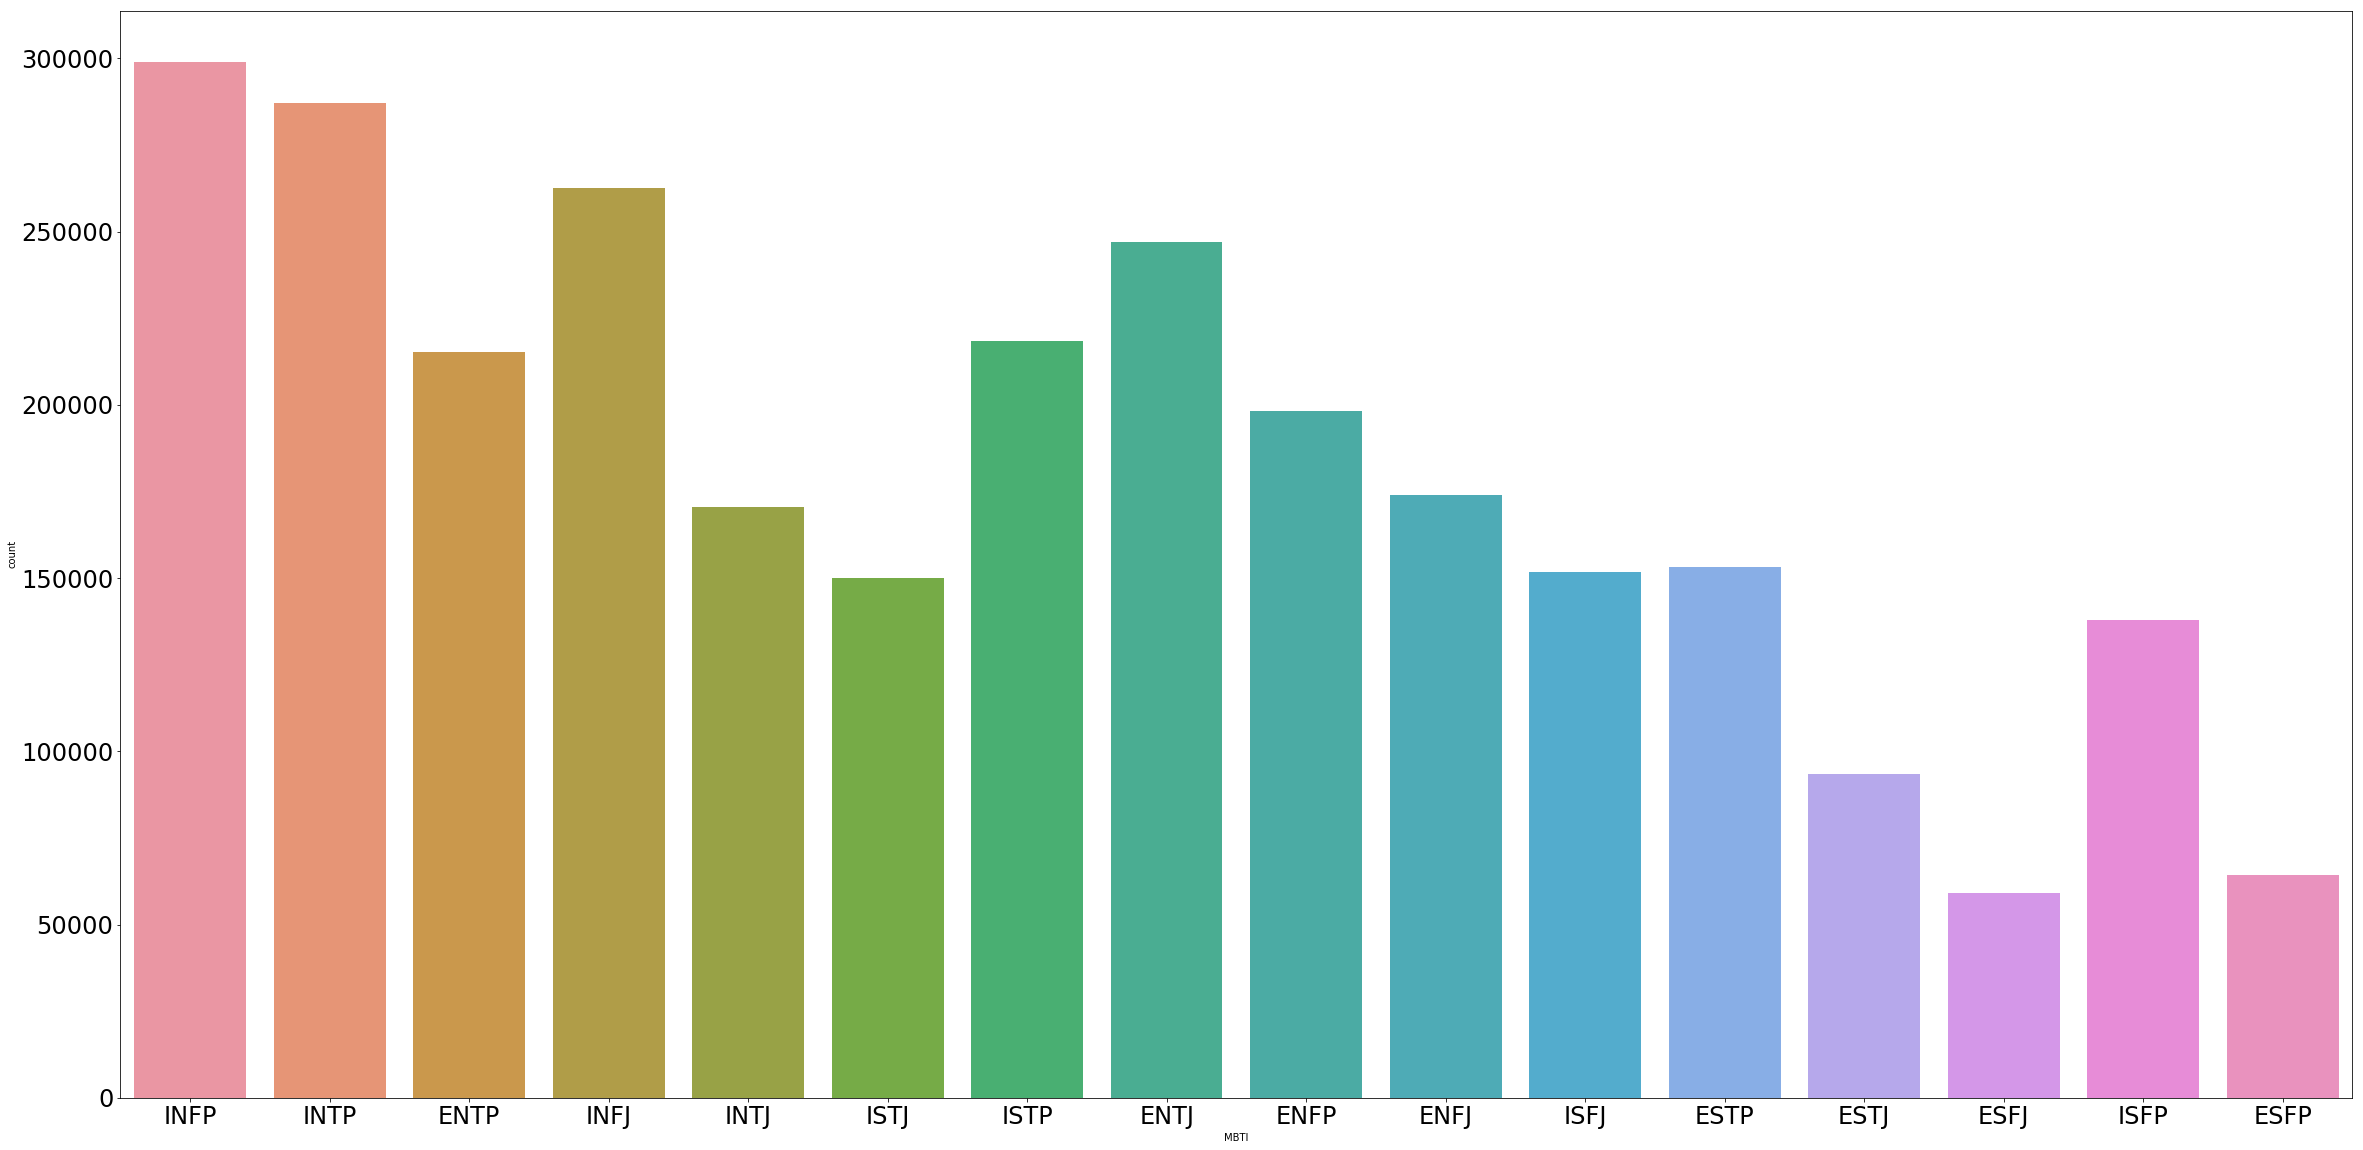

In [151]:
# distribution of data 

plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=data, x='MBTI')